## Imports

In [2]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [3]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 4 Implement and solve KNN regression:
> (a) Implement a KNN regression algorithm:

>> (i) Find the K nearest neighbours using a suitable distance metric (e.g. Euclidean). Compute the predicted response as the mean of the K neighbours.



In [4]:
# Implement the algorithm for knn
def knn(K, X, y, n):
    # Array to store predictions for each point
    yhat = np.zeros(n)
    
    for i in range(n):
        # Create dict to store K nearest neighbors with distances
        neighbors_dict = {}
        for j in range(n):
            if i != j:
                # Calculate Euclidean distance between points i and j
                dist = distance.euclidean(X[i], X[j])
                neighbors_dict[j] = dist
        
        # Sort by distance and keep K nearest neighbors
        sorted_neighbors = dict(sorted(neighbors_dict.items(), key=lambda x: x[1])[:K])
        
        # Calculate prediction as mean of K nearest neighbors' responses
        neighbor_responses = [y[idx] for idx in sorted_neighbors.keys()]
        yhat[i] = np.mean(neighbor_responses)

    return yhat

# it would make sense to test it  by evaluating the MSE
K = 5 # number of neighbours
yhat = knn(K, X, y, n)

mse = np.mean((y - yhat) ** 2)
print(f'MSE value for K = {K} is: {mse}')

MSE value for K = 5 is: 0.6182202180421111


>> (ii) Optional: Compute weights for the neighbours as the proportion of its distance to the total distance for the K nearest neighbours and Compute the predicted response as the (weighted) mean of the K neighbours.

In [5]:
# Implement the algorithm for weighted knn
def weighted_knn(K, X, y, n, p=2, epsilon=1e-6):
    # Array to store predictions for each point
    yhat = np.zeros(n)
    
    for i in range(n):
        # Create dict to store K nearest neighbors with distances
        neighbors_dict = {}
        for j in range(n):
            if i != j:
                # Calculate Euclidean distance between points i and j
                dist = distance.euclidean(X[i], X[j])
                neighbors_dict[j] = dist
        
        # Sort by distance and keep K nearest neighbors
        sorted_neighbors = dict(sorted(neighbors_dict.items(), key=lambda x: x[1])[:K])
        
        # Calculate weights using inverse distance weighting formula
        weights = [1 / (dist + epsilon)**p for dist in sorted_neighbors.values()]
        
        # Calculate weighted prediction using neighbor responses and weights
        neighbor_responses = [y[idx] for idx in sorted_neighbors.keys()]
        numerator = sum(w * resp for w, resp in zip(weights, neighbor_responses))
        denominator = sum(weights)
        yhat[i] = numerator / denominator

    return yhat

# it would make sense to test it  by evaluating the MSE
K = 5 # number of neighbours
yhat = weighted_knn(K, X, y, n)
mse = np.mean((y - yhat) ** 2)
# test implementation
print(f'MSE value for K = {K} is: {mse}')
# mse ~ 0.613 for K = 5

MSE value for K = 5 is: 0.6129560721540651


> (b) Find a solution to the diabetes data using KNN regression. Try different options for K.

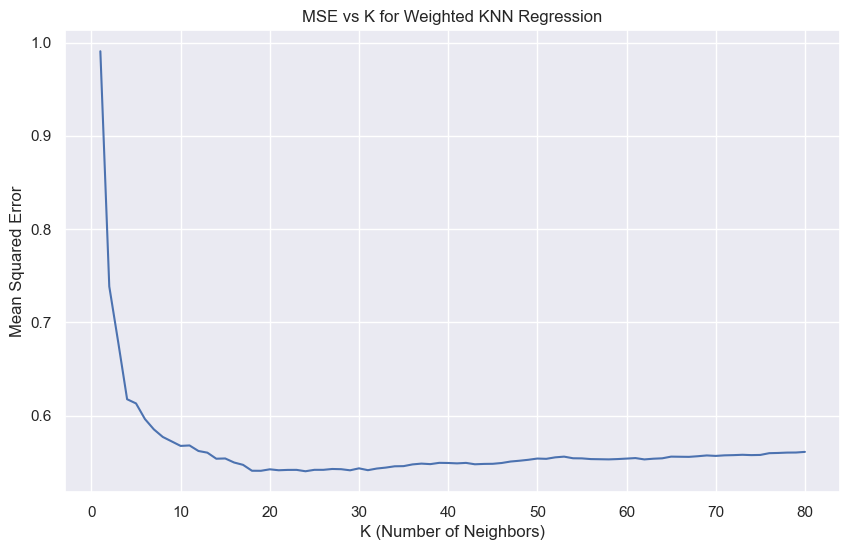

In [ ]:
# Use the KNN algorithm previously created with different values for K
# See which value for K gives the best results

K_values = [i + 1 for i in range(80)]

mses = []
min_mse = 1
min_K = None
for K in K_values:
    yhat = weighted_knn(K, X, y, n)
    mse = np.mean((y - yhat) ** 2)
    if mse < min_mse:
        min_mse = mse
        min_K = K

    mses.append(mse)

# Plot MSE vs K values
plt.figure(figsize=(10, 6))
plt.plot(K_values, mses, marker='')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs K for Weighted KNN Regression')
plt.grid(True)
plt.show()

K_min = min(mses)
print(min_K, min_mse)

What happens when we increase K?

Discuss the role of the chosen weights?